## Q1. Calculate the 95% confidence interval for a sample of data with a mean of 50 and a standard deviation of 5 using Python. Interpret the results.

In [19]:
import scipy.stats as stats

sample_size=30
sample_mean=50
sample_std=5

critical_value=stats.t.ppf(0.95,sample_size-1)
margin_error= critical_value*(sample_std/(sample_size**0.5))

print("The confidence interval is [{:.2f},{:.2f}]".format(sample_mean-margin_error,sample_mean+margin_error))


The confidence interval is [48.45,51.55]


## Q2. Conduct a chi-square goodness of fit test to determine if the distribution of colors of M&Ms in a bag matches the expected distribution of 20% blue, 20% orange, 20% green, 10% yellow, 10% red, and 20% brown. Use Python to perform the test with a significance level of 0.05.

In [20]:
import scipy.stats as stats

observed_frequencies = [0.2,0.2,0.2,0.1,0.1,0.2]

expected_frequencies = [0.2, 0.2, 0.2, 0.1, 0.1, 0.2]
total_observed = sum(observed_frequencies)

chi2_statistic, p_value = stats.chisquare(observed_frequencies, f_exp=[freq * total_observed for freq in expected_frequencies])

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: The distribution of colors does not match the expected distribution.")
else:
    print("Fail to reject the null hypothesis: The distribution of colors matches the expected distribution.")


Fail to reject the null hypothesis: The distribution of colors matches the expected distribution.


## Q3. Use Python to calculate the chi-square statistic and p-value for a contingency table with the following
## data:

## Interpret the results of the test.


H0: There is no significant difference

H1: There is significant difference

In [21]:
table=[[20,15],[10,25],[15,20]]

df=(len(table)-1)*(len(table[0])-1)

critical_value=stats.chi2.ppf(0.95, df)

res=stats.chi2_contingency(table)

if res.statistic>critical_value or res.pvalue<0.05:
    print("Reject null hypothesis. There is significant difference")
else:
    print("We failed to reject null hypothesis. There is no significant difference")

We failed to reject null hypothesis. There is no significant difference


## Q4. A study of the prevalence of smoking in a population of 500 individuals found that 60 individuals smoked. Use Python to calculate the 95% confidence interval for the true proportion of individuals in the population who smoke.

In [22]:
import math

sample_size = 500
smokers_in_sample = 60

p_hat = smokers_in_sample / sample_size

alpha = 0.05

critical_value = stats.norm.ppf(1 - alpha/2 )

margin_of_error = critical_value * math.sqrt((p_hat * (1 - p_hat)) / sample_size)

lower_bound = p_hat - margin_of_error
upper_bound = p_hat + margin_of_error

print(f"95% Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")

95% Confidence Interval: (0.0915, 0.1485)


## Q5. Calculate the 90% confidence interval for a sample of data with a mean of 75 and a standard deviation of 12 using Python. Interpret the results.

In [23]:
sample_mean = 75
sample_std_dev = 12
sample_size = 100  

confidence_level = 0.9
margin_of_error = stats.norm.ppf(confidence_level) * (sample_std_dev / (sample_size ** 0.5))
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print("90% Confidence Interval:")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")


90% Confidence Interval:
Lower bound: 73.46
Upper bound: 76.54


## Q6. Use Python to plot the chi-square distribution with 10 degrees of freedom. Label the axes and shade the area corresponding to a chi-square statistic of 15.

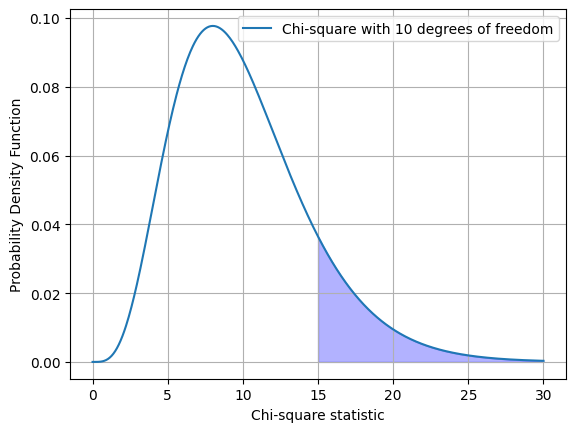

In [24]:
import numpy as np
import matplotlib.pyplot as plt

degrees_of_freedom = 10

x = np.linspace(0, 30, 500)

chi2_pdf = stats.chi2.pdf(x, df=degrees_of_freedom)

plt.plot(x, chi2_pdf, label=f"Chi-square with {degrees_of_freedom} degrees of freedom")

x_fill = np.linspace(15, 30, 500)
plt.fill_between(x_fill, stats.chi2.pdf(x_fill, df=degrees_of_freedom), color='blue', alpha=0.3)

plt.xlabel("Chi-square statistic")
plt.ylabel("Probability Density Function")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


## Q7. A random sample of 1000 people was asked if they preferred Coke or Pepsi. Of the sample, 520 preferred Coke. Calculate a 99% confidence interval for the true proportion of people in the population who prefer Coke.

To calculate a 99% confidence interval for the true proportion of people in the population who prefer Coke, we can use the formula for the confidence interval of a proportion. The formula is:

$ \text{Confidence Interval} = \left( \hat{p} - Z \cdot \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}, \quad \hat{p} + Z \cdot \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}} \right) $

Where:
- $\hat{p}$ is the sample proportion (520/1000 in this case).
- n is the sample size (1000 in this case).
- Z is the critical value from the standard normal distribution corresponding to the desired confidence level (99% in this case). For a 99% confidence level, \(Z \approx 2.576\).



In [25]:
sample_size=1000
prefer_coke=520
CI=0.99

proportion=prefer_coke/sample_size

critical_value=stats.norm.ppf(1-((1-CI)/2))

MOE= critical_value*(math.sqrt((proportion*(1-proportion))/sample_size))

lower_b=proportion-MOE
upper_b=proportion+MOE

print(f'The confidence interval is [{lower_b:.2f},{upper_b:.2f}]')

The confidence interval is [0.48,0.56]


## Q8. A researcher hypothesizes that a coin is biased towards tails. They flip the coin 100 times and observe 45 tails. Conduct a chi-square goodness of fit test to determine if the observed frequencies match the expected frequencies of a fair coin. Use a significance level of 0.05.

H0: The coin is fair

H1: The coin is unfair toward tail


In [26]:
sample_size=100
observed_tail=45

observed=[observed_tail,sample_size-observed_tail] #tail,head

expected=[sample_size*0.5,sample_size*0.5]

res=stats.chisquare(f_obs=observed,f_exp=expected)


if res.pvalue<0.05:
    print("reject null hypothesis, Coin is unfair")
else:
    print("We fail to reject null hypothesis, Coin is fair")

We fail to reject null hypothesis, Coin is fair


## Q9. A study was conducted to determine if there is an association between smoking status (smoker or non-smoker) and lung cancer diagnosis (yes or no). The results are shown in the contingency table below. Conduct a chi-square test for independence to determine if there is a significant association between smoking status and lung cancer diagnosis.

## Use a significance level of 0.05.

H0: There is no significant association between lung cancer diagnosis and smoking status

H1: There is significant association between lung cancer diagnosis and smoking status

In [27]:
table=[[60,140],[30,170]]

alpha=0.05
df=(len(table)-1)*(len(table[0])-1)
critical_value=stats.chi2.ppf(1-alpha, df)

chi2_stats=stats.chi2_contingency(table)

if chi2_stats.statistic>critical_value or chi2_stats.pvalue<0.05:
    print("We reject null hypotesis. There is significant association between lung cancer diagnosis and smoking status")
else:
    print("We fail to reject null hypothesis. There is no significant association between lung cancer diagnosis and smoking status")

We reject null hypotesis. There is significant association between lung cancer diagnosis and smoking status


## Q10. A study was conducted to determine if the proportion of people who prefer milk chocolate, dark chocolate, or white chocolate is different in the U.S. versus the U.K. A random sample of 500 people from the U.S. and a random sample of 500 people from the U.K. were surveyed. The results are shown in the contingency table below. Conduct a chi-square test for independence to determine if there is a significant association between chocolate preference and country of origin.

## Use a significance level of 0.01.

H0: There is a no significant association between chocolate preference and country of origin.

H1: There is a significant association between chocolate preference and country of origin.

In [28]:
table=[[200,150,150],[225,175,100]]

alpha=0.01

df=(len(table)-1)*(len(table[0])-1)

cri_val=stats.chi2.ppf(1-alpha, df)

res=stats.chi2_contingency(table)
res

if res.statistic>cri_val or chi2.pvalue<alpha:
        print("We reject null hypotesis. There is a significant association between chocolate preference and country of origin.")
else:
        print("We failed to reject null hypotesis. There is a no significant association between chocolate preference and country of origin.")


We reject null hypotesis. There is a significant association between chocolate preference and country of origin.


## Q11. A random sample of 30 people was selected from a population with an unknown mean and standard deviation. The sample mean was found to be 72 and the sample standard deviation was found to be 10. Conduct a hypothesis test to determine if the population mean is significantly different from 70. Use a significance level of 0.05.

H0: $\mu$=70

H1: $\mu\ne$70

In [29]:
alpha=0.05

sample_mean=72
sample_std=10
sample_size=30
hypothised_mean=70

z_stats=(sample_mean-hypothised_mean)/(sample_std/(sample_size**0.5))
z_stats

cri_val=stats.norm.ppf(1-alpha/2)

if abs(z_stats)>cri_val:
        print("We reject null hypotesis. The mean is significantly differnet from 70")
else:
        print("We failed to reject null hypotesis. The mean is not significantly differnet from 70")
    

We failed to reject null hypotesis. The mean is not significantly differnet from 70
